# Fourier Transform profilometry

**Importing necesaary packages.

In [81]:
import matplotlib.pyplot as PLT
import cv2 as CV
import numpy as NP

**Reading Refrence and modulated Fringe Pattern and converting them into grayscale.

In [82]:
X = CV.imread('reference.png')
Y = CV.imread('modulated1.png')

R = CV.cvtColor(X,CV.COLOR_BGR2GRAY)
M_1 = CV.cvtColor(Y,CV.COLOR_BGR2GRAY)


In [83]:
#CV.imshow('AMOL',X1)
#CV.waitKey(0)
#CV.destroyAllWindows()

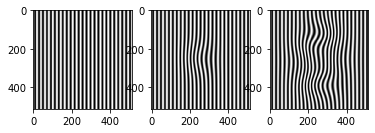

In [84]:
Y_1 = CV.imread('modulated2.png')

M_2 = CV.cvtColor(Y_1,CV.COLOR_BGR2GRAY)

PLT.figure()
PLT.subplot(131)
PLT.imshow(R,'gray')
PLT.subplot(132)
PLT.imshow(M_1,'gray')
PLT.subplot(133)
PLT.imshow(M_2,'gray')

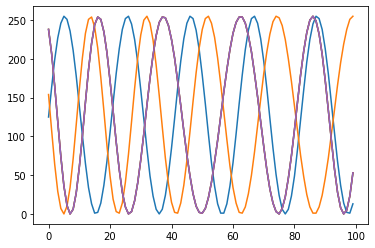

In [85]:
import matplotlib.pyplot as PLT
import numpy as NP
TEMP1 = NP.zeros((1,513))
TEMP1= X1[230,200:300]
TEMP2 = NP.zeros((1,513))
TEMP2= Y1[230,200:300]

TEMP3 = NP.zeros((1,513))
TEMP3= Y_1[230,200:300]


PLT.plot(TEMP1)
PLT.plot(TEMP2)
PLT.plot(TEMP3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


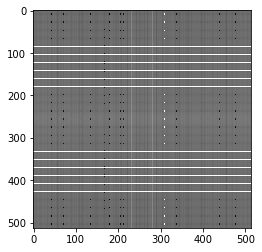

In [86]:
FFT_R = NP.fft.fft2(R)# Fourier Transform of refrence image.
FFT_SHIFT_R= NP.fft.fftshift(FFT_R)
PLT.imshow( 20*NP.log(NP.abs(FFT_SHIFT_R)),'gray')

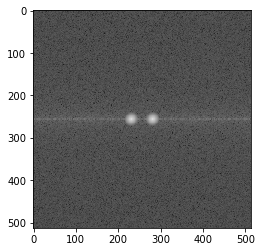

In [87]:
FFT_M_1 = NP.fft.fft2(M_1)  # Fourier Transform of modulated image.
FFT_SHIFT_M_1= NP.fft.fftshift(FFT_M) # Shifting all frequency at centre
PLT.imshow( 20*NP.log(NP.abs(FFT_SHIFT_M_1)),'gray')

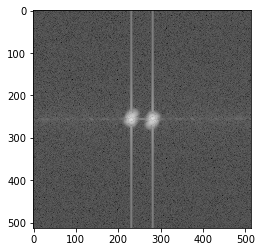

In [88]:
FFT_M_2 = NP.fft.fft2(M_2)  # Fourier Transform of modulated image.
FFT_SHIFT_M_2= NP.fft.fftshift(FFT_M_2) # Shifting all frequency at centre
PLT.imshow( 20*NP.log(NP.abs(FFT_SHIFT_M_2)),'gray')

**Fourier Tranform of Fringe pattern.

In [89]:
#FFT_M = NP.fft.fft2(M_1)  # Fourier Transform of modulated image.
#FFT_SHIFT_M= NP.fft.fftshift(FFT_M) # Shifting all frequency at centre 


#FFT_R = NP.fft.fft2(X1)# Fourier Transform of refrence image.
#FFT_SHIFT_R= NP.fft.fftshift(FFT_R)

**Creating Meshgrid....For 3D Ploting

In [90]:
X2 = NP.arange(0, 513)
Y2 = NP.arange(0, 513)
X2, Y2 = NP.meshgrid(X2, Y2)


In [91]:
Y2

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [510, 510, 510, ..., 510, 510, 510],
       [511, 511, 511, ..., 511, 511, 511],
       [512, 512, 512, ..., 512, 512, 512]])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


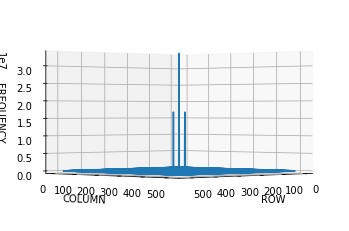

In [92]:
from mpl_toolkits.mplot3d import axes3d


fig = PLT.figure()

ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev = 0.05,azim= 45)
ax.plot_wireframe(X2, Y2, FFT_SHIFT_R, rstride=1, cstride=0)

ax.set_xlabel("ROW")
ax.set_ylabel("COLUMN")
ax.set_zlabel("FREQUENCY")

PLT.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


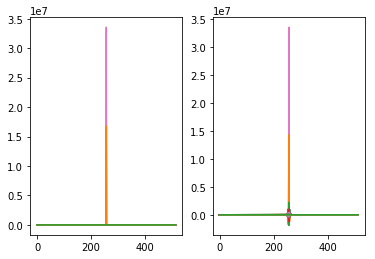

In [27]:
PLT.figure()
PLT.subplot(121)
PLT.plot(FFT_SHIFT_R)
PLT.subplot(122)
TEMP2 = PLT.plot(FFT_SHIFT_M_1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


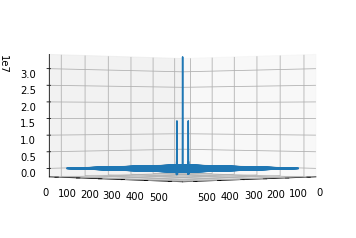

In [28]:
fig = PLT.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev = 0.05,azim= 45)
ax.plot_wireframe(X2, Y2, FFT_SHIFT_M_1, rstride=1, cstride=0)

PLT.show()

**Manually Extracting interest frequency spectra.

In [96]:
EXTRACT_M_2 = FFT_SHIFT_M_2.copy()
EXTRACT_M_2[:,0:270] = 0
EXTRACT_R = FFT_SHIFT_R.copy()
EXTRACT_R[:,0:270] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


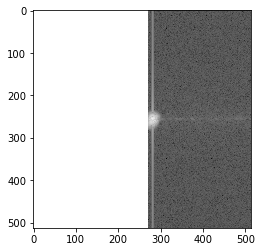

In [97]:
#FFT_M_1 = NP.fft.fft2(M_1)  # Fourier Transform of modulated image.
#FFT_SHIFT_M_1= NP.fft.fftshift(FFT_M) # Shifting all frequency at centre
PLT.imshow( 20*NP.log(NP.abs(EXTRACT_M_2)),'gray')
#PLT.imshow(NP.abs(EXTRACT_M_1),'gray')

**Going back into Time Domain.

In [98]:
SHIFT_M_2 = NP.fft.ifft2(NP.fft.ifftshift(EXTRACT_M_2))

SHIFT_R = NP.fft.ifft2(NP.fft.ifftshift(EXTRACT_R))

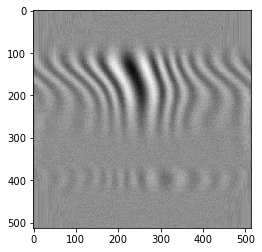

In [99]:
PLT.imshow(20*NP.log(NP.abs(SHIFT_M_2)),'gray')

In [121]:
NP.max(SHIFT_M_2)

(66.27447455856988+2.0362528102782664j)

**Calculating Phase...(WRAPPED PHASE)

In [100]:
PHASE_M_2 = NP.angle(SHIFT_M_2)
PHASE_R = NP.angle(SHIFT_R)

Text(0.5, 1.0, 'REFRENCE WRAPPED PHASE')

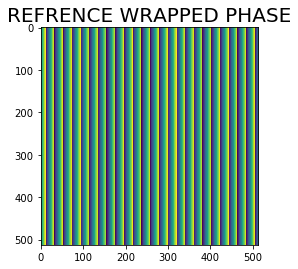

In [101]:
PLT.imshow(PHASE_R)
PLT.title('REFRENCE WRAPPED PHASE',size =20)

Text(0.5, 1.0, 'MODULATED WRAPPED PHASE')

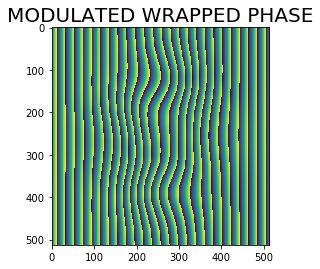

In [102]:
PLT.imshow(PHASE_M_2)
PLT.title('MODULATED WRAPPED PHASE',size= 20)

**As we know,range of wrapped phase will lie in between -pi to +pi.

In [34]:
print("Minimum value of  Wrapped refrenced Phase : {} radian ".format(NP.min(PHASE_R)))
print("Maximum value of  Wrapped refrenced Phase : {} radian ".format(NP.max(PHASE_R)))
print("Minimum value of  Wrapped MOdulated Phase : {} radian ".format(NP.min(PHASE_M)))
print("Maximum value of  Wrapped Modulated  Phase : {} radian ".format(NP.max(PHASE_M)))

Minimum value of  Wrapped refrenced Phase : -3.135967966318619 radian 
Maximum value of  Wrapped refrenced Phase : 3.135967966318619 radian 
Minimum value of  Wrapped MOdulated Phase : -3.141582393897795 radian 
Maximum value of  Wrapped Modulated  Phase : 3.1415827065743813 radian 


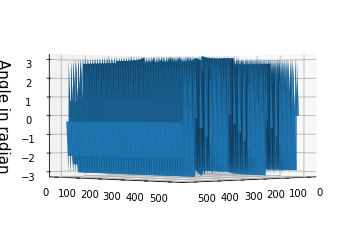

In [35]:

from matplotlib import cm
fig = PLT.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev = 0.5,azim= 45)
ax.plot_surface(X2, Y2,PHASE_M)
ax.set_zlabel("Angle in radian",size = 15)
PLT.show()

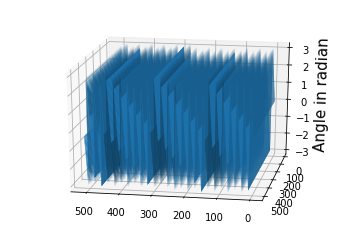

In [36]:
from matplotlib import cm
fig = PLT.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev = 20,azim= 100)
ax.plot_surface(X2, Y2,PHASE_R)
ax.set_zlabel("Angle in radian",size = 15)
PLT.show()

**Python has inbuilt unwrap function in Numpy and Scikit packages.
**We have used Numpy unwrap function.


* It take two parmeters:

1.Phase in radian(P).

2.Discont(Default is pi):It is nothing but maximum discontinuity between values.

# Note: If discontinuity in given wrapped Phase is less than Pi but larger than discont ,No unwrapping will be done.

In [103]:
UN_M = NP.unwrap(PHASE_M_2)
UN_R = NP.unwrap(PHASE_R)

In [38]:
print("Minimum value of  UnWrapped refrenced Phase : {} radian ".format(NP.min(UN_R)))
print("Maximum value of  UnWrapped refrenced Phase : {} radian ".format(NP.max(UN_R)))
print("Minimum value of  UnWrapped MOdulated Phase : {} radian ".format(NP.min(UN_M)))
print("Maximum value of  UnWrapped Modulated  Phase : {} radian ".format(NP.max(UN_M)))

Minimum value of  UnWrapped refrenced Phase : -1.237793077505719e-16 radian 
Maximum value of  UnWrapped refrenced Phase : 156.77398626036947 radian 
Minimum value of  UnWrapped MOdulated Phase : -0.001789932631584297 radian 
Maximum value of  UnWrapped Modulated  Phase : 156.7742878411286 radian 


As we can see that unwrapped Refrence Phase lie between -2Pi to 50pi

Unwrapped modulated Phase lie between 0 to 50pi

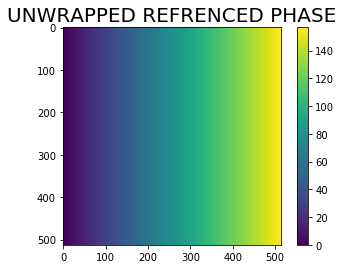

In [104]:
p=PLT.imshow(UN_R)
PLT.title("UNWRAPPED REFRENCED PHASE",size = 20)
PLT.colorbar(p)
PLT.show()

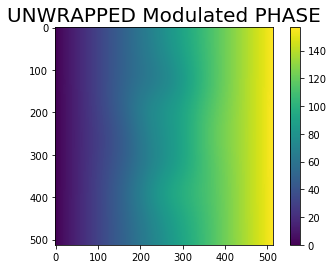

In [106]:
p=PLT.imshow(UN_M)
PLT.title("UNWRAPPED Modulated PHASE",size = 20)
PLT.colorbar(p)
PLT.show()

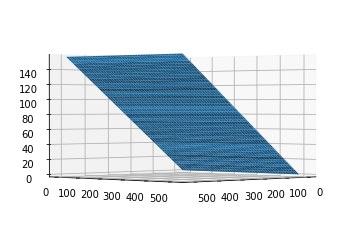

In [41]:
fig = PLT.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev = 0.5,azim= 45)
ax.plot_surface(X2, Y2,UN_R)
PLT.show()

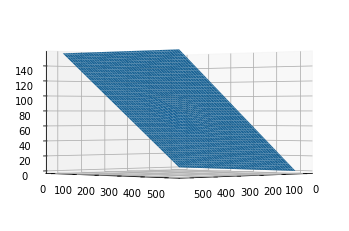

In [94]:
fig = PLT.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev = 0,azim= 45)
ax.plot_surface(X2, Y2,UN_M)
PLT.show()

# OUTPUT PHASE = UNWRAPPED MODULATED PHASE - UNWRAPPED REFRENCED PHASE

In [107]:
OUTPUT = UN_M-UN_R

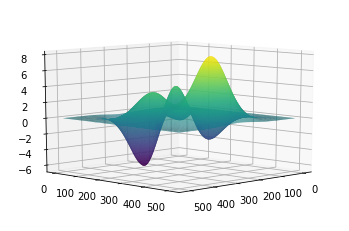

In [120]:
fig = PLT.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev = 10,azim= 45)
ax.plot_surface(X2, Y2,OUTPUT,rstride=1, cstride=1,cmap='viridis', edgecolor='none')
PLT.show()

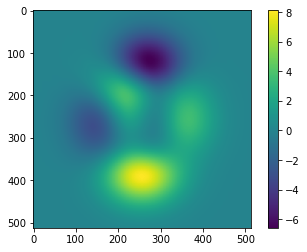

In [109]:
p=PLT.imshow(OUTPUT)
PLT.colorbar(p)
PLT.show()

# GROUND TRUTH

In [116]:
import scipy.io
MAT = scipy.io.loadmat('GrundTruth.mat')
MAT
J = MAT['Object']


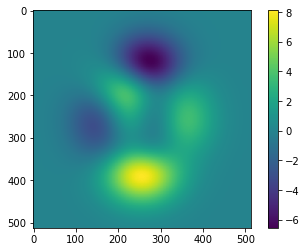

In [117]:
p=PLT.imshow(J)
#p=PLT.imshow(OUTPUT)
PLT.colorbar(p)
PLT.show()

In [119]:
print("Minimum value of  OUTPUT : {}  ".format(NP.min(OUTPUT)))
print("Maximum value of  OUTPUT : {}  ".format(NP.max(OUTPUT)))
print("Minimum value of  J : {}  ".format(NP.min(J)))
print("Maximum value of  J : {}  ".format(NP.max(J)))


Minimum value of  OUTPUT : -6.57265622089264  
Maximum value of  OUTPUT : 8.11064707394479  
Minimum value of  J : -6.551165277667565  
Maximum value of  J : 8.109138294137836  


** OUTPUT Phase lie between -2pi to +3pi(approx)

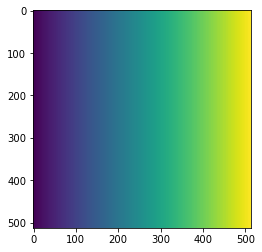

In [110]:
PLT.imshow(UN_R)

# Assingment :1

1.Create Smooth Unwrapped Phase .

2.With help of it create 3 phase shifted Sinusoidal Fringe pattern.

3.Calculate Wrapped Phase By given Formula.

4.Apply inbuilt Unwrap Function and Compare result with created phase.

In [56]:
I0 =NP.zeros((UN_R.shape[0],UN_R.shape[1]))
I1 =NP.zeros((UN_R.shape[0],UN_R.shape[1]))
I2 =NP.zeros((UN_R.shape[0],UN_R.shape[1]))

for row in range(0,UN_R.shape[0]):
    for col in range(0,UN_R.shape[1]):
        I0[row,col] = 120+ 120*NP.cos(UN_R[row,col])
        I1[row,col] = 120 +120*NP.cos(UN_R[row,col]-NP.pi)
        I2[row,col] = 120 + 120*NP.cos(UN_R[row,col]+NP.pi/2)

In [57]:
I1.shape

(513, 513)

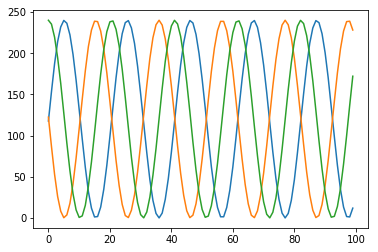

In [58]:
import matplotlib.pyplot as PLT
import numpy as NP
TEMP1 = NP.zeros((1,513))
TEMP1= I0[230,200:300]
TEMP2 = NP.zeros((1,513))
TEMP2= I1[230,200:300]

TEMP3 = NP.zeros((1,513))
TEMP3= I2[230,200:300]


PLT.plot(TEMP1)
PLT.plot(TEMP2)
PLT.plot(TEMP3)

In [47]:
NP.max(I0),NP.max(I1),NP.max(I2)

(240.0, 239.99942834398928, 239.99942834398928)

# Phase Shifted Sinusoidal Fringes

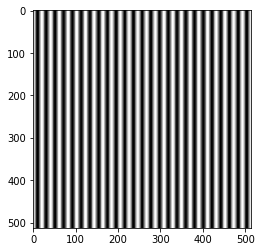

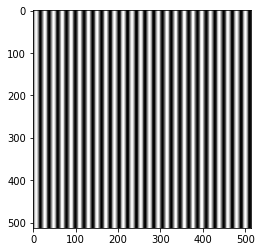

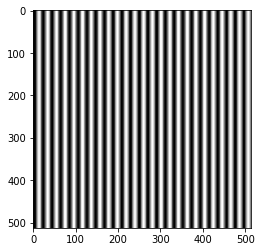

In [31]:
PLT.figure()
PLT.imshow(I0,'gray')
PLT.figure()
PLT.imshow(I1,'gray')
PLT.figure()
PLT.imshow(I2,'gray')




This one is standard formula for computing Wrapped Phase from 3 phase shifted fringes.

In [108]:
D = 2*NP.arctan(NP.sqrt(3)*(I1-I2)/(2*I0 - I1- I2))

In [109]:
print("Minimum value of  Wrapped  Phase : {} radian ".format(NP.min(D)))
print("Maximum value of  Wrapped  Phase : {} radian ".format(NP.max(D)))


Minimum value of  Wrapped  Phase : -3.132122675274916 radian 
Maximum value of  Wrapped  Phase : 3.1321226752749927 radian 


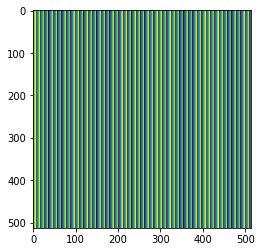

In [110]:
PLT.imshow(D)

# If in array differnece between two number is greater than 'Discont' then it will unwrap it .
 
# if it is less than 'Discont' or less than 'pi' it will not do anything.

1.Here discontinuity is less than 5.6.

2.If we set discont parmeter greater than 5.65 then there will be no unwrapping ,if we increase discont than 5.6 it will increase discontinuity.

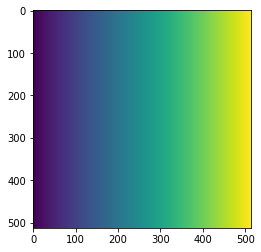

In [136]:
UN1 = NP.unwrap(D,discont=5.5)
PLT.imshow(UN1)

In [137]:
print("Minimum value of  UN-Wrapped  Phase : {} radian ".format(NP.min(UN1)))
print("Maximum value of  UN-Wrapped  Phase : {} radian ".format(NP.max(UN1)))


Minimum value of  UN-Wrapped  Phase : 8.204640795236538e-16 radian 
Maximum value of  UN-Wrapped  Phase : 313.54797252073894 radian 


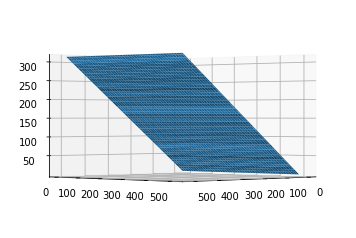

In [106]:
fig = PLT.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev = 0,azim= 45)
ax.plot_surface(X2, Y2,UN1)
PLT.show()

# Discont = 5.67

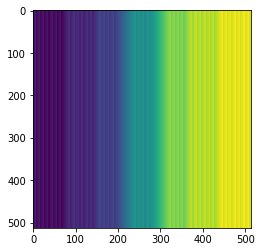

In [113]:
UN2 = NP.unwrap(D,discont=5.67)
PLT.imshow(UN2)

**Discontinuity in Unwrapped Phase is clearly visible.

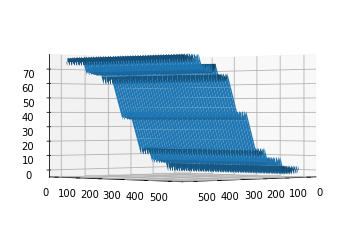

In [38]:
fig = PLT.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev = 0,azim= 45)
ax.plot_surface(X2, Y2,UN2)
PLT.show()

# Comparing with groundtruth

In [111]:
import scipy.io
MAT = scipy.io.loadmat('GrundTruth.mat')

In [101]:
import scipy.io
MAT = scipy.io.loadmat('GrundTruth.mat')
MAT
J = MAT['Object']
p=PLT.imshow(J)
#p=PLT.imshow(OUTPUT)
PLT.colorbar(p)
PLT.show()

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Apr  2 12:41:48 2019',
 '__version__': '1.0',
 '__globals__': [],
 'Def_Unwrapped_Phase': array([[-5.44713979e-05,  3.05784933e-01,  6.10815326e-01, ...,
          1.56161793e+02,  1.56468728e+02,  1.56774024e+02],
        [ 1.61971389e-04,  3.05633884e-01,  6.11018259e-01, ...,
          1.56161650e+02,  1.56468880e+02,  1.56773844e+02],
        [-3.00089891e-04,  3.05873145e-01,  6.10590451e-01, ...,
          1.56161894e+02,  1.56468551e+02,  1.56774139e+02],
        ...,
        [ 2.06193915e-04,  3.05674704e-01,  6.11004244e-01, ...,
          1.56161767e+02,  1.56468966e+02,  1.56773940e+02],
        [ 1.12196497e-04,  3.05569203e-01,  6.10902270e-01, ...,
          1.56161743e+02,  1.56468914e+02,  1.56773861e+02],
        [-1.13981359e-04,  3.05618620e-01,  6.10768478e-01, ...,
          1.56161684e+02,  1.56468678e+02,  1.56773855e+02]]),
 'Def_Wrapped_Phase': array([[-5.44713979e-05,  3.05784933e-01,  6.

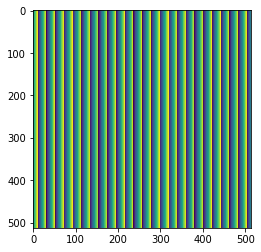

In [144]:
M=MAT['Ref_Wrapped_Phase']
PLT.imshow(M)

In [145]:
NP.min(M),NP.max(M)

(-3.136424229272326, 3.1364242292723263)

In [127]:
NP.sqrt(NP.sum(NP.square(UN1-M)))

46256.60660549314

In [ ]:
NP.sqrt(NP.sum(NP.square(D-M)))

In [96]:
LE=NP.array([[20,1],[3,4]])
NP.square(LE)

array([[400,   1],
       [  9,  16]], dtype=int32)

In [99]:
LE**LE

array([[  0,   1],
       [ 27, 256]], dtype=int32)

In [112]:
J = MAT['Object']

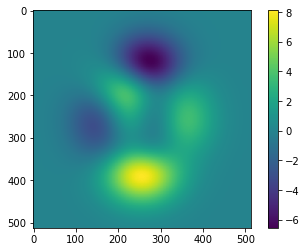

In [113]:
J = MAT['Object']
p=PLT.imshow(J)
#p=PLT.imshow(OUTPUT)
PLT.colorbar(p)
PLT.show()

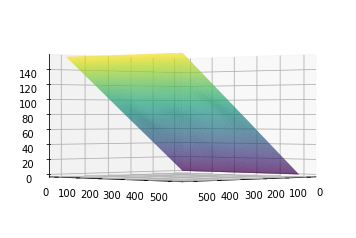

In [128]:

fig = PLT.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev = 0,azim= 45)
ax.plot_surface(X2, Y2,M,rstride=1, cstride=1,cmap='viridis', edgecolor='none')
PLT.show()


Current Update:

# Simple and rapid shape Measurement of Object with surface discontinuity.

Problem: 

1.A major obstacle that frustrates the use of sinusoidal structured light projection technique is that the recovered phase
using afore mentioned fringe analysis techniques is mathematically limited to the interval [-π, π] corresponding to the
principle value of arc tan function. 

2.In general the true phase may range over an interval greater than 2π in which case the
recovered phase contains artificial discontinuities.

# -----------------------------------------------------------------------------------------------------------

Phase Unwrapping is all about finding appropiate integer n(x,y) coresponding to every pixel.

φ_UN(x, y) = φ_W(x, y) + 2 n(x, y) π 

            = φ_W(x, y) + φ_OFF(x, y)

# Approach discussed in Paper:

1.In this new approach, an additional image of the object captured under illumination of a color-coded pattern is used for
calculating n (x, y). 

2.A color-coded pattern is generated using MATLAB in a computer and projected with the help of a
LCD projector. 

3.Color-coded pattern generated comprises of: an array of rectangular shaped bands, with each band
identified uniquely by its color and arranged in a specific sequence as shown.

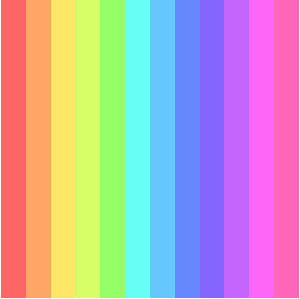

# Basic idea:


1.This pattern is  projected on refrence plane and its image is recoreded.

2.A non-planar real object will distort the projected structured pattern .

3.Deviations in the detected color at any point on the non-planar object surface
essentially correspond to local height deviations.

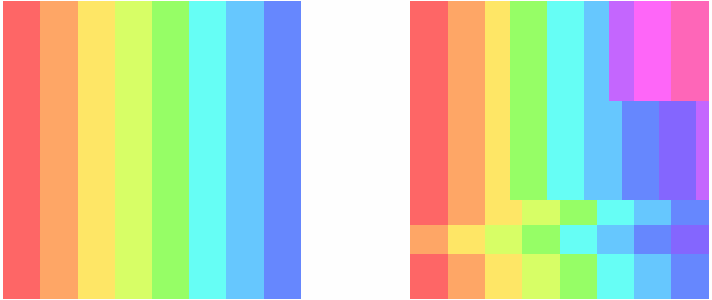

# Procedure:

1. Generate Reference Hue Matrix (RHM) and Object Hue Matrix (OHM) from captured images

00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63

00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 

.00 .00 .00 .07 .07 .07 .14 .14 .14 .21 .21 .21 .28 .28 .28 .49 .49 .49 .56 .56 .56 .63 .63 .63 .

# -----------------------------------------------------------------------------------------------------------

2. Prepare Look up table:

Hue .00 .07 .14 .21 .28 .49 .56 .63 .70 .77 .84 .91

Color

Index 1 2 3 4 5 6 7 8 9 10 11 12

# -----------------------------------------------------------------------------------------------------------

3.With the help of LUT generate Reference Index Matrix (RIM) and Object Index Matrix (OIM)

# -----------------------------------------------------------------------------------------------------------

4.Calculate Backward Difference Matrix...., which is  obtained by subtracting (i)th column from (i+1)th column of OIM,

# NOTE:  Absolute value of any element greater than one in BD matrix indicates the presence of surface discontinuity at that location (that caused a phase modulation greater than 2π in fringe pattern).

# -----------------------------------------------------------------------------------------------------------

5. Calculate OFFSet Phase

**Difference Matrix that is obtained by subtracting
RIM from OIM

# Experiment Result:


Object With Discontinuity

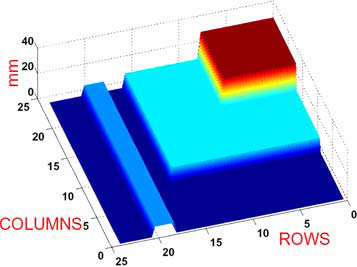

Color Coded Pattern on Refrence Plane and Object Surface

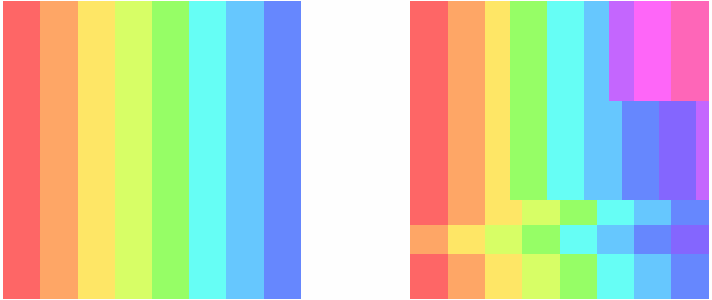

Look Up Table

                                               Index 1 2 3 4 5 6 7 8 9 10 11

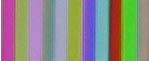

Wrapped phase map calculated by Takeda’s method

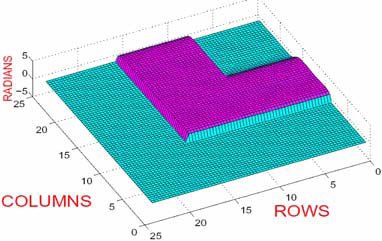

Result of new Unwrapping Algorithm

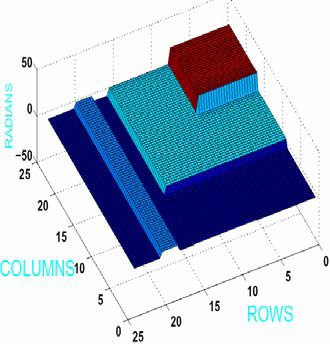

# -------------------------------------------------------------------------------------------------------